In [1]:

import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import torch.nn.functional as F
import torch


In [2]:

ZS13 = h5py.File("../ZafrensData/zel024/microscopy/ZS13.segmentations.h5", "r+")
ZS25 = h5py.File("../ZafrensData/zel024/microscopy/ZS25.segmentations.h5", "r+")
#ZS26 = h5py.File("../ZafrensData/zel031/microscopy/ZS26.segmentations.h5", "r+")
#ZS27 = h5py.File("../ZafrensData/zel031/microscopy/ZS27.segmentations.h5", "r+")


In [3]:

Z13_image_dataset = ZS13["images"][()]
Z25_image_dataset = ZS25["images"][()]
#Z26_image_dataset = ZS26["images"][()]
#Z27_image_dataset = ZS27["images"][()]


In [10]:


# Convert to tensor if needed
Z25_image_tensor = torch.tensor(Z13_image_dataset, dtype=torch.float32)

# Add a channel dimension: (21910, 1, 340, 340)
Z25_image_tensor = Z25_image_tensor.unsqueeze(1)

# Downsample using bilinear interpolation
Z25_downsampled = F.interpolate(Z25_image_tensor, size=(125, 125), mode='bilinear', align_corners=False)

# Remove the extra channel if needed: (21910, 170, 170)
Z25_downsampled = Z25_downsampled.squeeze(1)

# Convert back to NumPy if necessary
Z13_image_dataset_np = Z25_downsampled.numpy()




# Convert to tensor if needed
Z25_image_tensor = torch.tensor(Z25_image_dataset, dtype=torch.float32)

# Add a channel dimension: (21910, 1, 340, 340)
Z25_image_tensor = Z25_image_tensor.unsqueeze(1)

# Downsample using bilinear interpolation
Z25_downsampled = F.interpolate(Z25_image_tensor, size=(125, 125), mode='bilinear', align_corners=False)

# Remove the extra channel if needed: (21910, 170, 170)
Z25_downsampled = Z25_downsampled.squeeze(1)

# Convert back to NumPy if necessary
Z25_downsampled_np = Z25_downsampled.numpy()



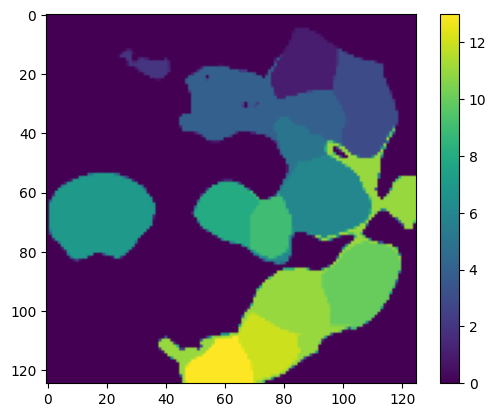

In [11]:

plt.imshow(Z25_downsampled_np[10]) 
plt.colorbar()  # Add a colorbar to visualize the label values
plt.show()


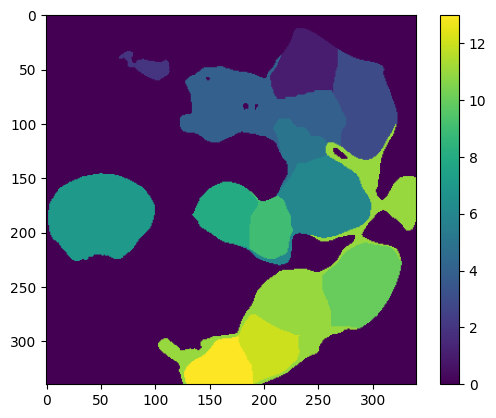

In [4]:

plt.imshow(Z25_image_dataset[10]) 
plt.colorbar()  # Add a colorbar to visualize the label values
plt.show()


In [5]:
Z25_image_dataset.shape

(21910, 340, 340)

In [14]:

all_images = np.concatenate((Z13_downsampled_np, Z25_downsampled_np
                            # ,Z26_image_dataset, Z27_image_dataset
                            ), axis=0)


In [15]:

all_images.shape


(32571, 125, 125)

In [16]:

Z13_image_barcode = pd.read_csv("../ZafrensData/zel024/microscopy/ZS13_dim_0_metadata.csv")
Z25_image_barcode = pd.read_csv("../ZafrensData/zel024/microscopy/ZS25_dim_0_metadata.csv")
#Z26_image_barcode = pd.read_csv("../ZafrensData/zel031/microscopy/ZS26_dim_0_metadata.csv")
#Z27_image_barcode = pd.read_csv("../ZafrensData/zel031/microscopy/ZS27_dim_0_metadata.csv")


In [17]:

# Columns to concatenate
columns_to_concat = ['physical_well_id', 'control_rx_id', 'bb1_id', 'bb2_id', 'bb3_id', 'bb4_id', 'censored']

# Concatenate columns with an underscore separator
Z13_image_barcode['sample'] = Z13_image_barcode[columns_to_concat].astype(str).agg('_'.join, axis=1)
Z25_image_barcode['sample'] = Z25_image_barcode[columns_to_concat].astype(str).agg('_'.join, axis=1)

# Columns to concatenate
#Z26_image_barcode['bb4_id'] = 1
#Z26_image_barcode['bb3_id'] = 1

#Z27_image_barcode['bb4_id'] = 1
#Z27_image_barcode['bb3_id'] = 1

#columns_to_concat = ['physical_well_id', 'control_rx_id', 'bb1_id', 'bb2_id', 'censored']

#Z26_image_barcode['sample'] = Z26_image_barcode[columns_to_concat].astype(str).agg('_'.join, axis=1)
#Z27_image_barcode['sample'] = Z27_image_barcode[columns_to_concat].astype(str).agg('_'.join, axis=1)



In [18]:

merged_df = pd.concat([Z13_image_barcode, Z25_image_barcode
                      # , Z26_image_barcode, Z27_image_barcode
                      ], axis=0, join="inner").reset_index()


In [19]:
merged_df

index  hdf5_dim_0_index  physical_well_id  control_rx_id  bb1_id  \
0          0                 0                50             -1     213   
1          1                 1                51             -1      -1   
2          2                 2                60             -1     207   
3          3                 3                62             -1     207   
4          4                 4               305             -1     215   
...      ...               ...               ...            ...     ...   
32566  21905             21905             49274             -1      -1   
32567  21906             21906             49278              1      -1   
32568  21907             21907             49278              1      -1   
32569  21908             21908             49282             -1      -1   
32570  21909             21909             49282             -1      -1   

       bb2_id  bb3_id  bb4_id censored                       sample  
0         417       1    1387    False   50_-1_213_417_1_1387_False  
1          -1      -1      -1     True       51_-1_-1_-1_-1_-1_True  
2         123       2    1411    False   60_-1_207_123_2_1411_False  
3         352       2    1554    False   62_-1_207_352_2_1554_False  
4         420       1    1489    False  305_-1_215_420_1_1489_False  
...       ...     ...     ...      ...                          ...  
32566      -1      -1      -1     True    49274_-1_-1_-1_-1_-1_True  
32567      -1      -1      -1    False    49278_1_-1_-1_-1_-1_False  
32568      -1      -1      -1    False    49278_1_-1_-1_-1_-1_False  
32569      -1      -1      -1     True    49282_-1_-1_-1_-1_-1_True  
32570      -1      -1      -1     True    49282_-1_-1_-1_-1_-1_True  

[32571 rows x 10 columns]

In [20]:

merged_df_not_censored = merged_df[merged_df['censored'] == False]


In [21]:

merged_df_not_censored.shape


(24577, 10)

In [22]:

merged_df_not_censored


index  hdf5_dim_0_index  physical_well_id  control_rx_id  bb1_id  \
0          0                 0                50             -1     213   
2          2                 2                60             -1     207   
3          3                 3                62             -1     207   
4          4                 4               305             -1     215   
5          5                 5               306             -1     202   
...      ...               ...               ...            ...     ...   
32562  21901             21901             49269             -1     205   
32563  21902             21902             49270             -1     269   
32564  21903             21903             49270             -1     269   
32567  21906             21906             49278              1      -1   
32568  21907             21907             49278              1      -1   

       bb2_id  bb3_id  bb4_id censored                         sample  
0         417       1    1387    False     50_-1_213_417_1_1387_False  
2         123       2    1411    False     60_-1_207_123_2_1411_False  
3         352       2    1554    False     62_-1_207_352_2_1554_False  
4         420       1    1489    False    305_-1_215_420_1_1489_False  
5         352       1     440    False     306_-1_202_352_1_440_False  
...       ...     ...     ...      ...                            ...  
32562     420       2    1497    False  49269_-1_205_420_2_1497_False  
32563     422       1    1613    False  49270_-1_269_422_1_1613_False  
32564     422       1    1613    False  49270_-1_269_422_1_1613_False  
32567      -1      -1      -1    False      49278_1_-1_-1_-1_-1_False  
32568      -1      -1      -1    False      49278_1_-1_-1_-1_-1_False  

[24577 rows x 10 columns]

In [23]:

df_unique = merged_df_not_censored.drop_duplicates(subset=['sample'])


In [24]:
df_unique

index  hdf5_dim_0_index  physical_well_id  control_rx_id  bb1_id  \
0          0                 0                50             -1     213   
2          2                 2                60             -1     207   
3          3                 3                62             -1     207   
4          4                 4               305             -1     215   
5          5                 5               306             -1     202   
...      ...               ...               ...            ...     ...   
32555  21894             21894             49257             -1     222   
32559  21898             21898             49260             -1     201   
32561  21900             21900             49269             -1     205   
32563  21902             21902             49270             -1     269   
32567  21906             21906             49278              1      -1   

       bb2_id  bb3_id  bb4_id censored                         sample  
0         417       1    1387    False     50_-1_213_417_1_1387_False  
2         123       2    1411    False     60_-1_207_123_2_1411_False  
3         352       2    1554    False     62_-1_207_352_2_1554_False  
4         420       1    1489    False    305_-1_215_420_1_1489_False  
5         352       1     440    False     306_-1_202_352_1_440_False  
...       ...     ...     ...      ...                            ...  
32555     418       2    1544    False  49257_-1_222_418_2_1544_False  
32559     195       1    1418    False  49260_-1_201_195_1_1418_False  
32561     420       2    1497    False  49269_-1_205_420_2_1497_False  
32563     422       1    1613    False  49270_-1_269_422_1_1613_False  
32567      -1      -1      -1    False      49278_1_-1_-1_-1_-1_False  

[20386 rows x 10 columns]

In [25]:

all_images.shape


(32571, 125, 125)

In [26]:

selected_indices = df_unique.index.values  # or some filtered indices like metadata[metadata['label'] == 'A'].index.values


In [27]:

selected_images = all_images[selected_indices]


In [28]:

selected_images.shape


(20386, 125, 125)

In [29]:
df_unique = df_unique.reset_index()

In [30]:

df_unique.drop(columns=['level_0'], inplace=True)
df_unique.drop(columns=['index'], inplace=True)


In [31]:
with open("../ZafrensData/final_dataset/images_zel024_125_20K.pkl", "wb") as file:
    pkl.dump(selected_images, file)

In [32]:
with open("../ZafrensData/final_dataset/images_metadata_zel024_125_20K.pkl", "wb") as file:
    pkl.dump(df_unique, file)